# FFT Application: Signal smoothing by convolution¶
In this Jupyter notebook we will remove image errors from pictures that were taken 1966 during the lunar orbiter mission.

Here some basic imports and functions:

In [16]:
import numpy as np
from numpy import sin, cos, exp, pi
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from math import ceil, floor
from numpy.fft import fft2, ifft2
from matplotlib.pyplot import figure
#plt.rcParams["figure.figsize"] = (10,10)

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def center_spectrum(image):
    image = np.roll(image, image.shape[0]//2, axis=0)
    image = np.roll(image, image.shape[1]//2, axis=1)
    return image

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    im_fft = center_spectrum(im_fft)
    #im_fft = im_fft[(im_fft.shape[0]//4-100):(im_fft.shape[0]//4+100),(im_fft.shape[1]//2-100):(im_fft.shape[1]//2+100)]
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()
    
def plot_image(image, title=''):
    plt.figure()
    plt.imshow(image, plt.cm.gray)
    plt.title(title)
    plt.show()
    
def remove_lines(f_image, border=1, treshold=1e3, keep_u=5, keep_d=5):
    f_image2 = f_image.copy()
    f_image_cut = np.where(np.abs(f_image2)<treshold, f_image2, f_image2/np.abs(f_image2)*treshold)
    #f_image_cut = np.where(np.abs(f_image2)>treshold, f_image2, 0)
    r, c = f_image2.shape
    #f_image2 = np.zeros(f_image.shape)
    f_image2[:,0:border] = f_image_cut[:,0:border]
    f_image2[:,(c-border):c] = f_image_cut[:,(c-border):c]
    keep = list(range(0, keep_d)) + list(range(f_image.shape[0]-keep_u,f_image.shape[0]))
    #print(keep)
    #print(f_image2[keep,:])
    f_image2[keep,:] = f_image[keep,:]
    #f_image2[keep,:] = 0
    return f_image2

First load the original image:

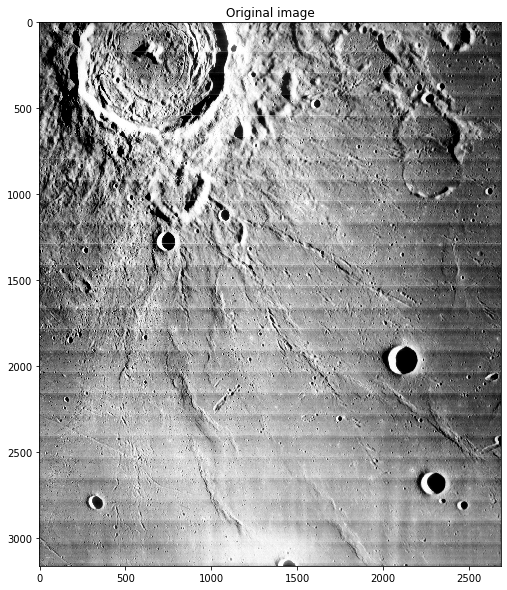

In [17]:
image = plt.imread(r'moon\moon_1.png').astype(float)
image = rgb2gray(image)
plot_image(image, title='Original image')

Now we use Fast Fourier Transform to calculate the frequency spectrum of the image:

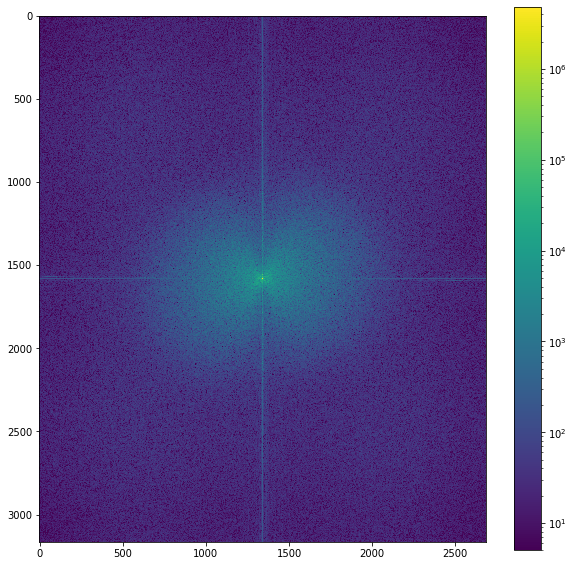

In [18]:
f_image = fft2(image)
plot_spectrum(f_image)

The vertical line in the frequency spectrum corresponds to the horizontal lines in the picture.

So we remove it but keep the center of the spectrum, because it contains important information:

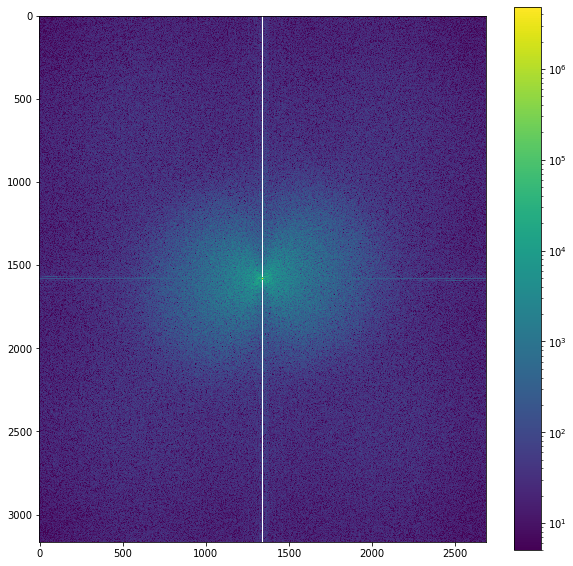

In [19]:
f_image_filtered = remove_lines(f_image, border=1, treshold=0, keep_u=10, keep_d=10)
plot_spectrum(f_image_filtered)

Transform the frequency spectrum back to the filtered image:

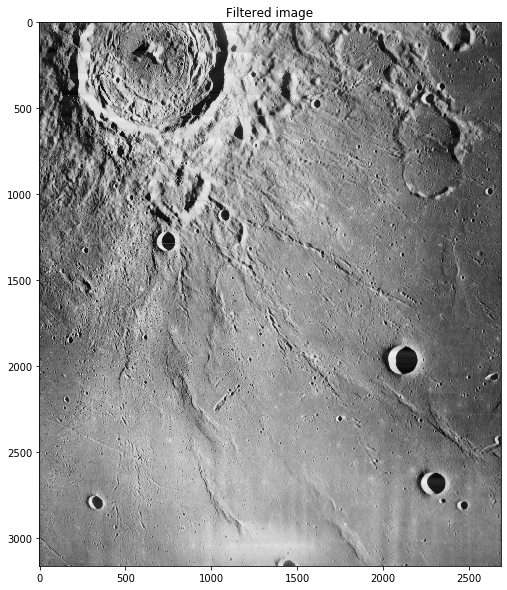

In [15]:
image_filtered = ifft2(f_image_filtered).real
plot_image(image_filtered, 'Filtered image')